# Hash Function Distribution Examples
This notebook contains Python code examples for evaluating hash function distribution across buckets.

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict
import hashlib
import statistics

## Utility Function: Bucket Distribution

In [ ]:
def bucket_distribution(data, num_buckets, hash_fn):
    buckets = defaultdict(list)
    for item in data:
        bucket = hash_fn(item) % num_buckets    # this makes it be a certain number of buckets and not just every individual number
        buckets[bucket].append(item)
    return buckets

## Hash Function Definitions

### Python's Built-in `hash()` Function

In [16]:
print(hash("apple"))
print(hash("banana"))
print(hash("cherry"))

-7792473819740246136
1256113441766016753
-1193775033752740429


*   `hash()` is salted by default – varies value outputs per session
    *   Uses processor clock, other things to randomize
    *   To make it reproducible: `PYTHONHASHSEED=0`

### Custom Hash Functions

In [4]:
def poor_hash(key):
    return len(key)

def simple_ascii_sum(key):
    return sum(ord(char) for char in key)

def hash_sha256(key):
    return int(hashlib.sha256(key.encode()).hexdigest(), 16)

In [17]:
print(poor_hash("apple"))
print(simple_ascii_sum("apple"))
print(hash_sha256("apple"))

5
530
26452929773915387181124022930352263286101059613432915788569047929437325971227


## Dataset and Plotting Utility

In [12]:
data = [f"key{i}" for i in range(1000)]
num_buckets = 10

def plot_distribution(title, counts):
    plt.bar(range(len(counts)), counts)
    plt.title(title)
    plt.xlabel("Bucket")
    plt.ylabel("# of Keys")
    plt.show()

## Example 1: Python Built-in `hash()`

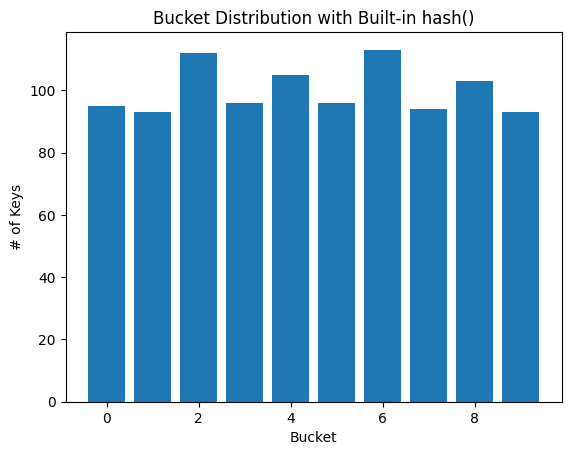

In [22]:
buckets = bucket_distribution(data, num_buckets, hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Bucket Distribution with Built-in hash()", counts)

In [ ]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")   # want to minimize all of these
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 7.73
Max Bucket Size: 113
Collisions: 990


## Example 2: Poor Hash Function (`len(key)`)

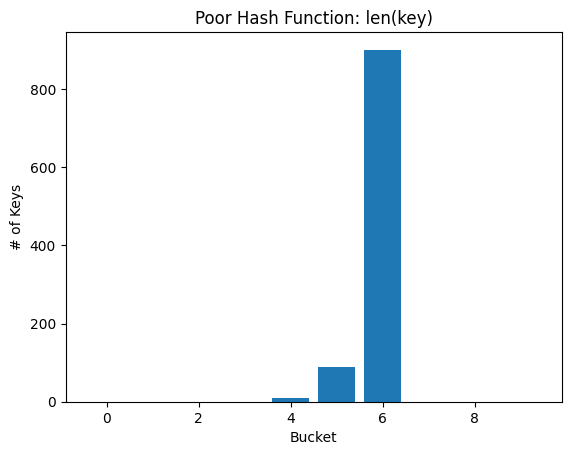

In [24]:
buckets = bucket_distribution(data, num_buckets, poor_hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Poor Hash Function: len(key)", counts)

In [25]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 282.49
Max Bucket Size: 900
Collisions: 997


## Example 3: Simple ASCII Sum

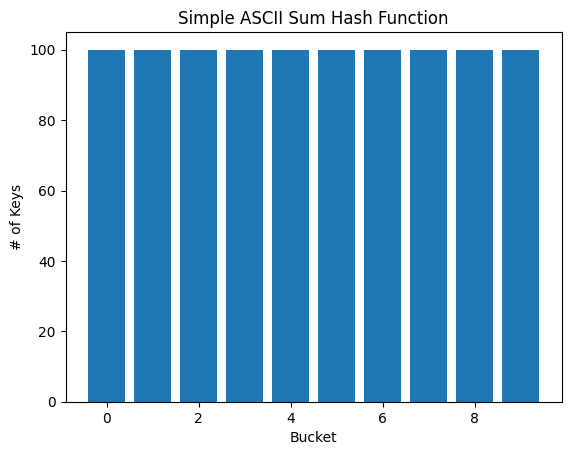

In [26]:
buckets = bucket_distribution(data, num_buckets, simple_ascii_sum)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Simple ASCII Sum Hash Function", counts)

In [27]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 0.00
Max Bucket Size: 100
Collisions: 990


## Example 4: SHA-256

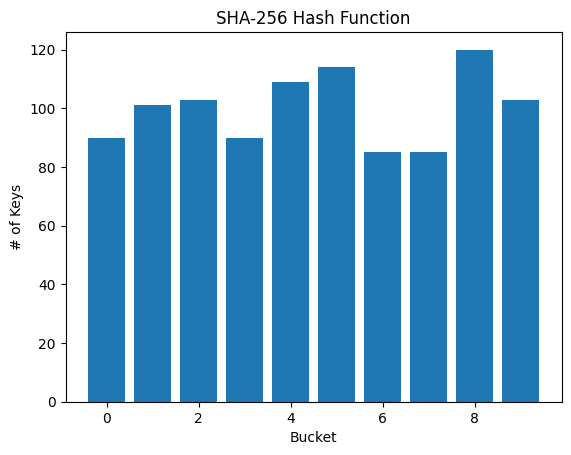

In [31]:
buckets = bucket_distribution(data, num_buckets, hash_sha256)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("SHA-256 Hash Function", counts)

In [32]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 12.23
Max Bucket Size: 120
Collisions: 990


### Reflective Prompt #1
**Looking at the bucket distributions across the different hash functions, which one surprised you the most and why? What patterns or anomalies did you observe that you did not expect?**

I was surprised that the SHA-256 hash function wasn't the most uniformly distributed. When I tested the function with a simple string, it produced a VERY long number, so I assumed that there would be a larger variety of numbers data would hash to and thus a more uniform distribution among buckets. However, I suppose that since the actual buckets are assigned by modding the generated number to the number of buckets, once you get to a certain variety of generated numbers, the uniformity of the distribution more depends on the number of buckets. For example, if you have 10 buckets, you could have hashes that are a billion digits long, but the bucket each hash goes into will just depend on the last digit since that will constitute the remainder when divided by 10. In that way, more digits isn't always better. 

More digits also didn't seem to radically improve the number of collisions. The simple ASCII sum (3 digits) and SHA-256 (16 digits) produced the same number of collisions, 990, and even the poor hash function only produced 7 more collisions than the others. This was unexpected to me because obviously, if a number has more digits, that's more digits that can be different. If a hash function produces more digits, that has to translate to a more even distribution across buckets or a smaller number of collisions, or else you're just using more storage for no reason. Although, simpler isn't always better, either – SOME complexity is necessary for a uniform distribution and minimizing collisions, as demonstrated by the poor hash function.

### Reflective Prompt #2
**If you had to design your own hash function, what strategies would you use to ensure a balanced bucket distribution? What kind of inputs might break a poorly designed hash function?**

I would use a prime number as my number to mod by to avoid excess collisions. I would also make sure whichever number I was hashing to would always have the same number of digits as my modding number so I wouldn't be taking up storage with more digits for no reason. For example, if my modding number was 97, it wouldn't make sense to have three-digit numbers being hashed because the only possible remainders would be 0-96 anyway. Given a larger number of digits didn't seem to decrease collisions, this seems reasonable. 

As seen in the poor hash function above, inputs that are very similar in length and/or content may break a poor hash function. Since a hash function must always produce the same output from the same input, all the information it has to vary the outputs are the content and number of characters it's working with. Thus, the output must change drastically with small changes in the input to avoid collisions. For example, I could make a hash function that made the output negative if the input had an odd number of vowels and positive otherwise. Assuming the bucket assignment could compute negative indexes, this shouldn't change the bucket distribution much, but it may avoid collisions since it would double the possible number of outputs. This would also only take up one extra bit of storage, as the computer could store it as 0 = negative, 1 = positive.